In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import random

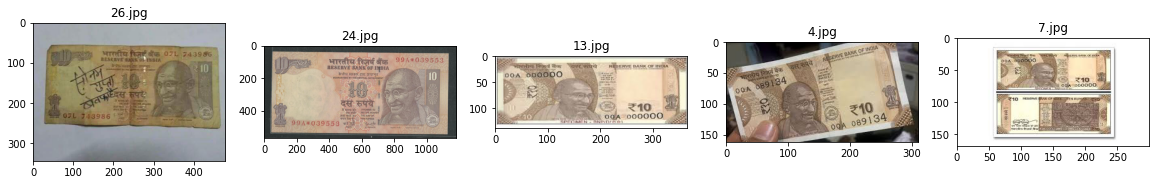

In [4]:
plt.figure(figsize=(20,20))
img_folder = r'/content/drive/MyDrive/dataset/train/Tennote'
for i in range(5):
  randomFile = random.choice(os.listdir(img_folder))
  image_path = os.path.join(img_folder, randomFile)
  img = mpimg.imread(image_path)
  ax = plt.subplot(1, 5, i+1)
  ax.title.set_text(randomFile)
  plt.imshow(img)

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/test'

In [7]:
folders = glob('./content/drive/MyDrive/dataset/train/*')


In [8]:
folders

[]

In [9]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [10]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [18]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 1.9388 - accuracy: 0.1830

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 12s 2s/step - loss: 1.9388 - accuracy: 0.1830 - val_loss: 1.9454 - val_accuracy: 0.1429
Epoch 2/50
5/5 [==============================] - 12s 2s/step - loss: 1.9264 - accuracy: 0.2026 - val_loss: 1.9216 - val_accuracy: 0.1905
Epoch 3/50
5/5 [==============================] - 12s 2s/step - loss: 1.8773 - accuracy: 0.2222 - val_loss: 1.8619 - val_accuracy: 0.2381
Epoch 4/50
5/5 [==============================] - 12s 2s/step - loss: 1.7293 - accuracy: 0.3203 - val_loss: 1.7928 - val_accuracy: 0.2857
Epoch 5/50
5/5 [==============================] - 12s 2s/step - loss: 1.5212 - accuracy: 0.4575 - val_loss: 1.7504 - val_accuracy: 0.4524
Epoch 6/50
5/5 [==============================] - 12s 2s/step - loss: 1.4832 - accuracy: 0.4510 - val_loss: 1.7485 - val_accuracy: 0.4048
Epoch 7/50
5/5 [==============================] - 12s 2s/step - loss: 1.2828 - accuracy: 0.5294 - val_loss: 1.3943 - val_accuracy: 0.5238
Epoch 8/50
5/5 [=============================

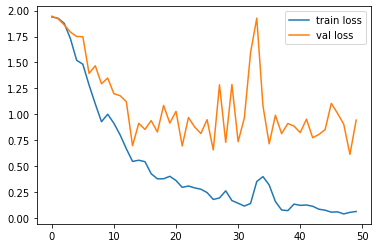

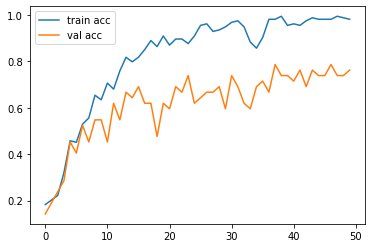

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
y_pred = Classifier.predict(test_set)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([6, 1, 4, 1, 3, 4, 1, 6, 0, 2, 4, 0, 5, 1, 5, 0, 2, 1, 4, 1, 0, 6,
       5, 4, 4, 1, 2, 2, 6, 0, 6, 6, 0, 0, 1, 2, 5, 2, 2, 0, 6, 6])